### Unsupervised Learning: Kmeans Clustering 
- Dataset: Iris data
- Learning Date: 22-Aug-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pd.Timestamp.now()

Timestamp('2023-08-22 07:34:15.322030')

In [3]:
# read data to a dataframe

url = 'https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv'
df = pd.read_csv(url)
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,virginica
58,6.6,2.9,4.6,1.3,versicolor
80,5.5,2.4,3.8,1.1,versicolor
127,6.1,3.0,4.9,1.8,virginica
41,4.5,2.3,1.3,0.3,setosa
130,7.4,2.8,6.1,1.9,virginica
6,4.6,3.4,1.4,0.3,setosa
146,6.3,2.5,5.0,1.9,virginica
14,5.8,4.0,1.2,0.2,setosa
101,5.8,2.7,5.1,1.9,virginica


In [4]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

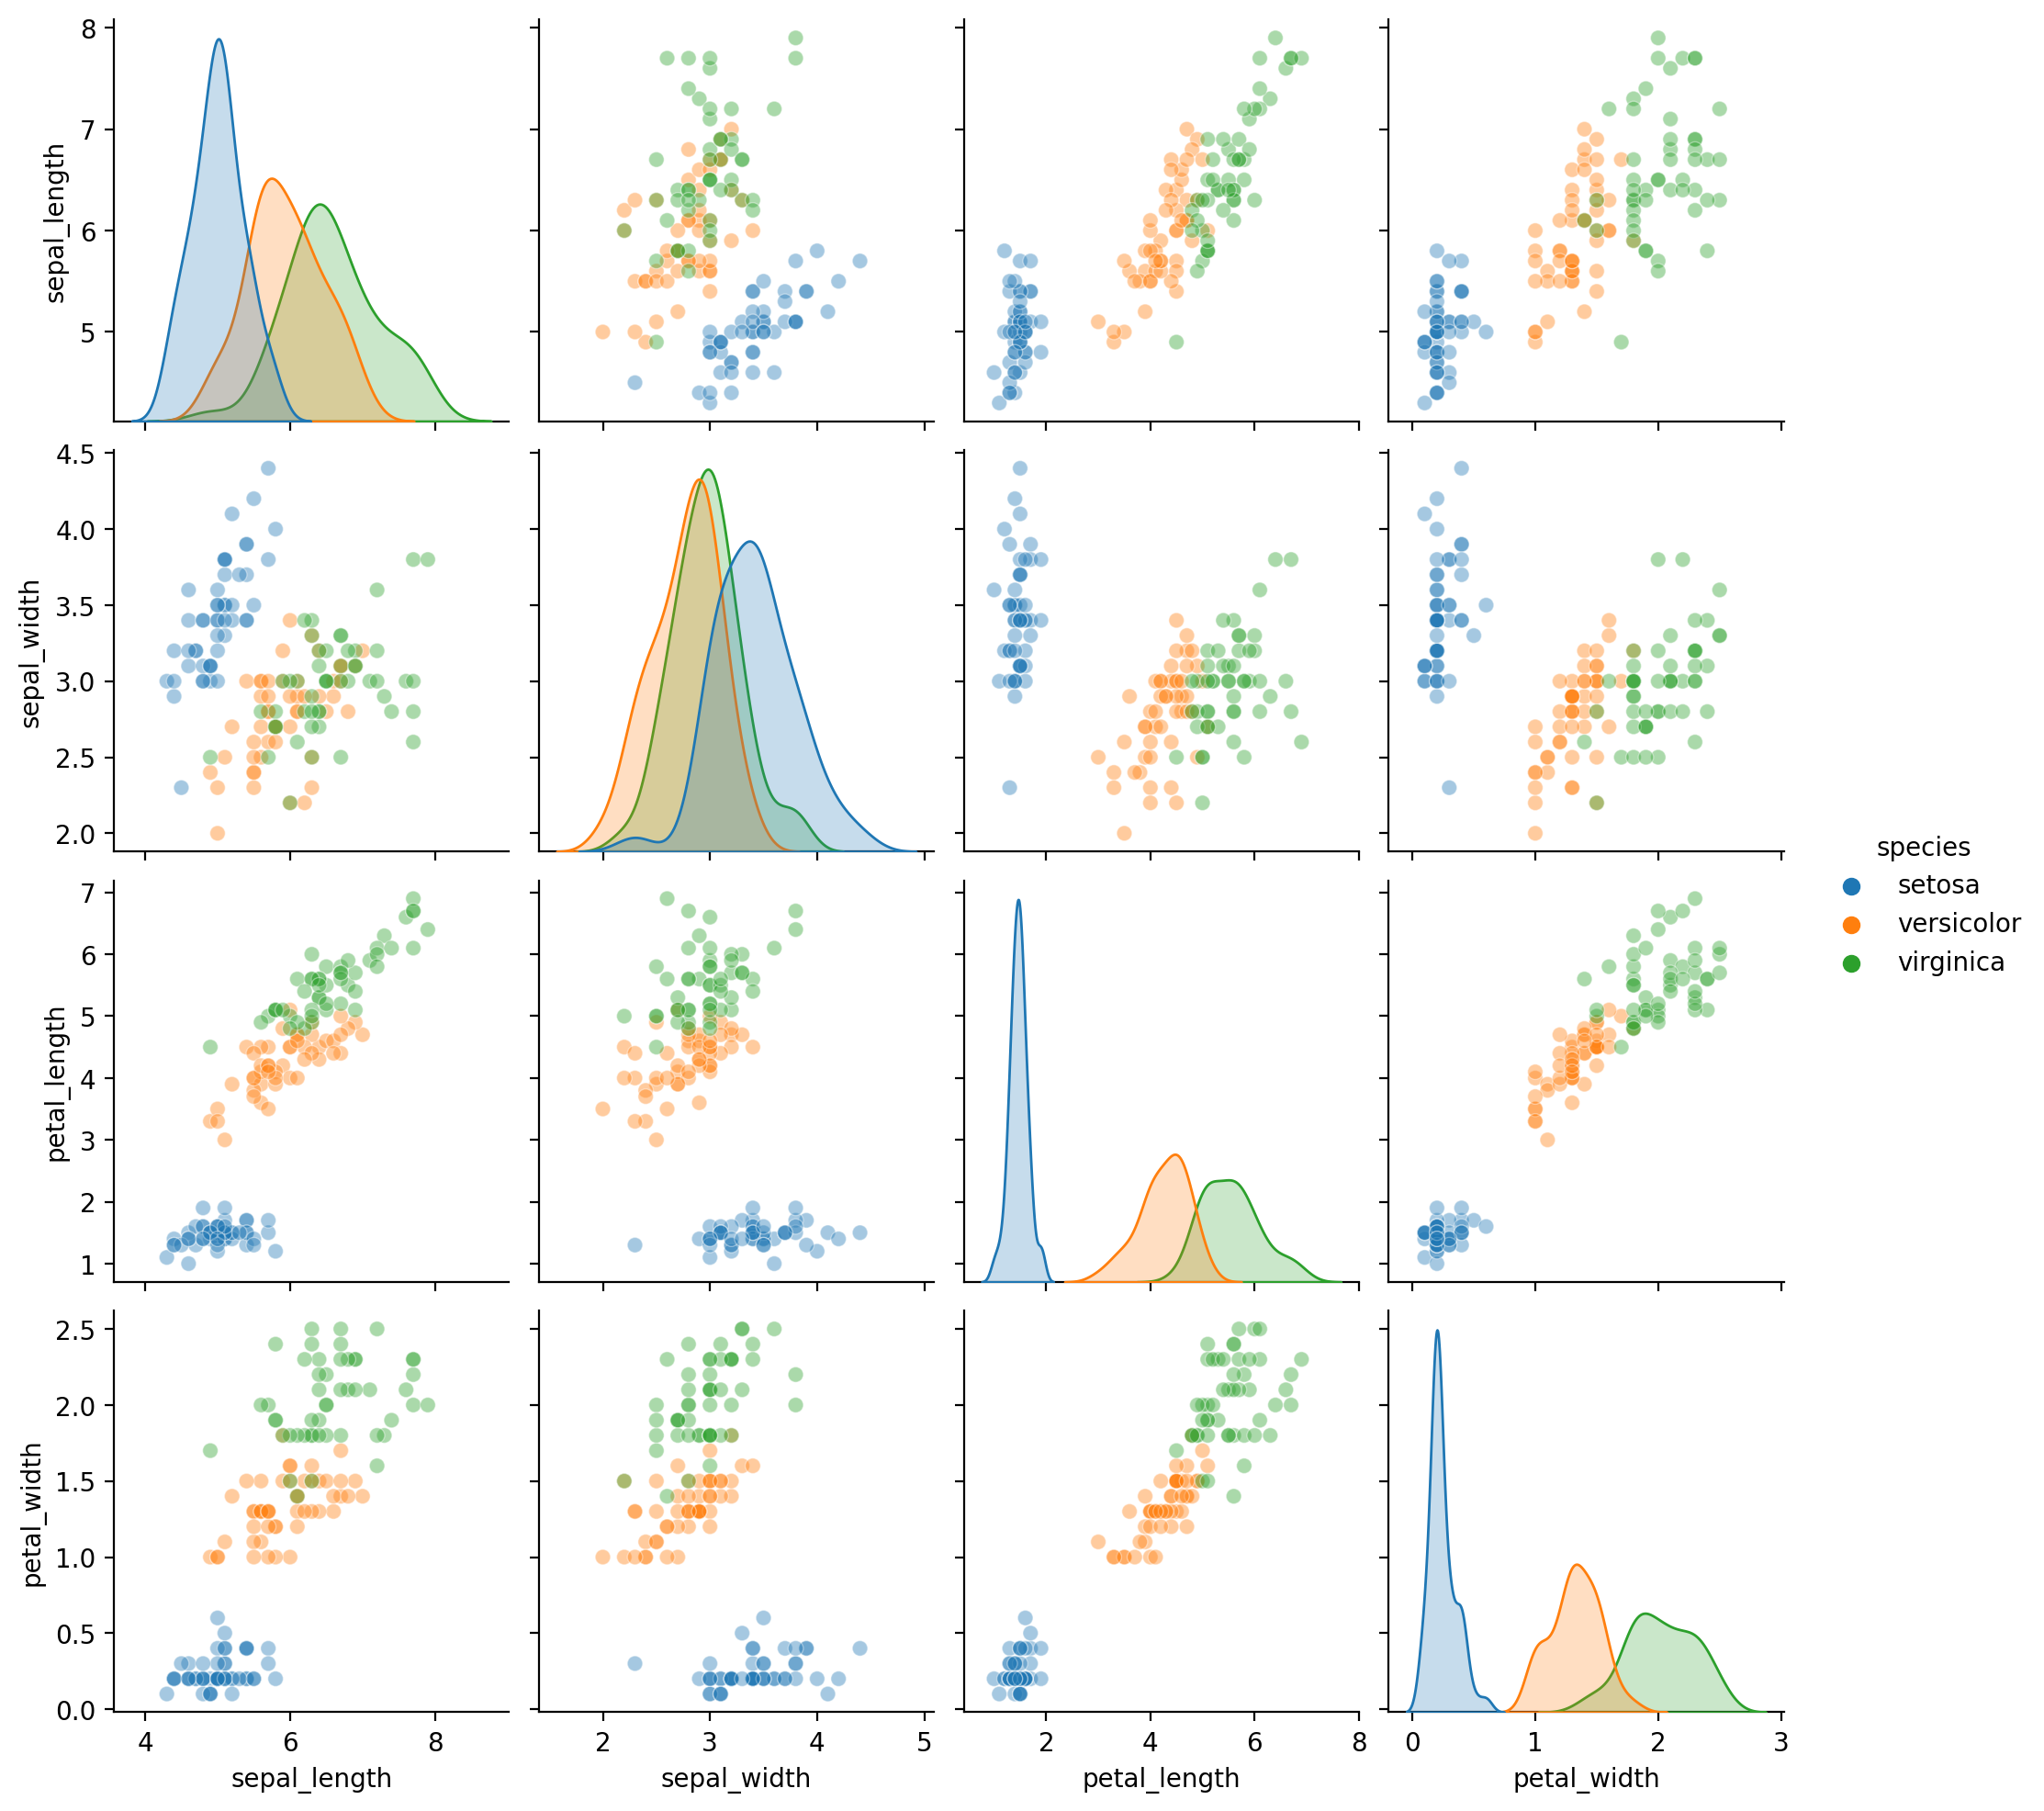

In [8]:
# plot

sns.pairplot(df, vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
             hue = 'species', 
             # markers=['o', 'D', '+'], error line
             plot_kws = {'alpha': .4});

### Scikit-learn: Kmeans Clustering

In [9]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

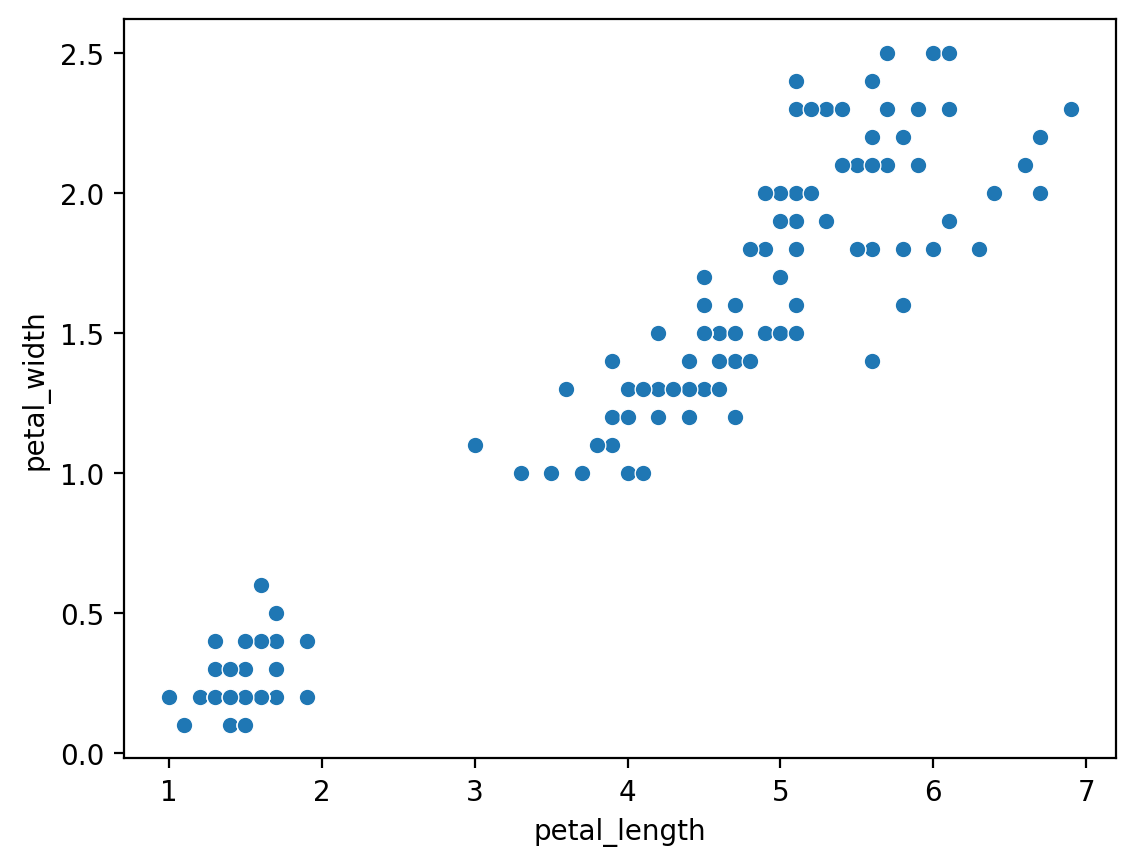

In [11]:
sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width')

<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

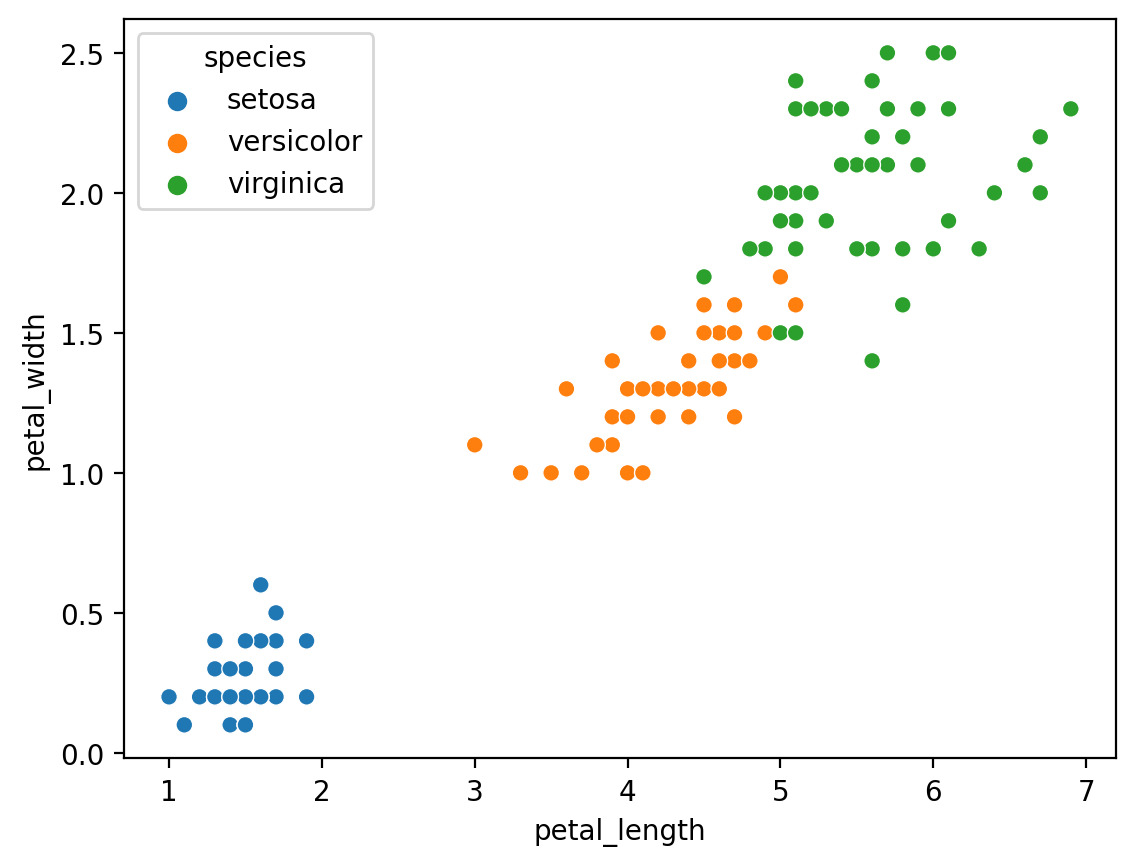

In [12]:
sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'species')

In [13]:
rx = np.random.uniform(1, 7, 3)
rx

array([4.92393812, 5.80021231, 6.12322738])

In [14]:
ry = np.random.uniform(0, 2.5, 3)
ry

array([0.65446686, 1.216386  , 2.38125651])

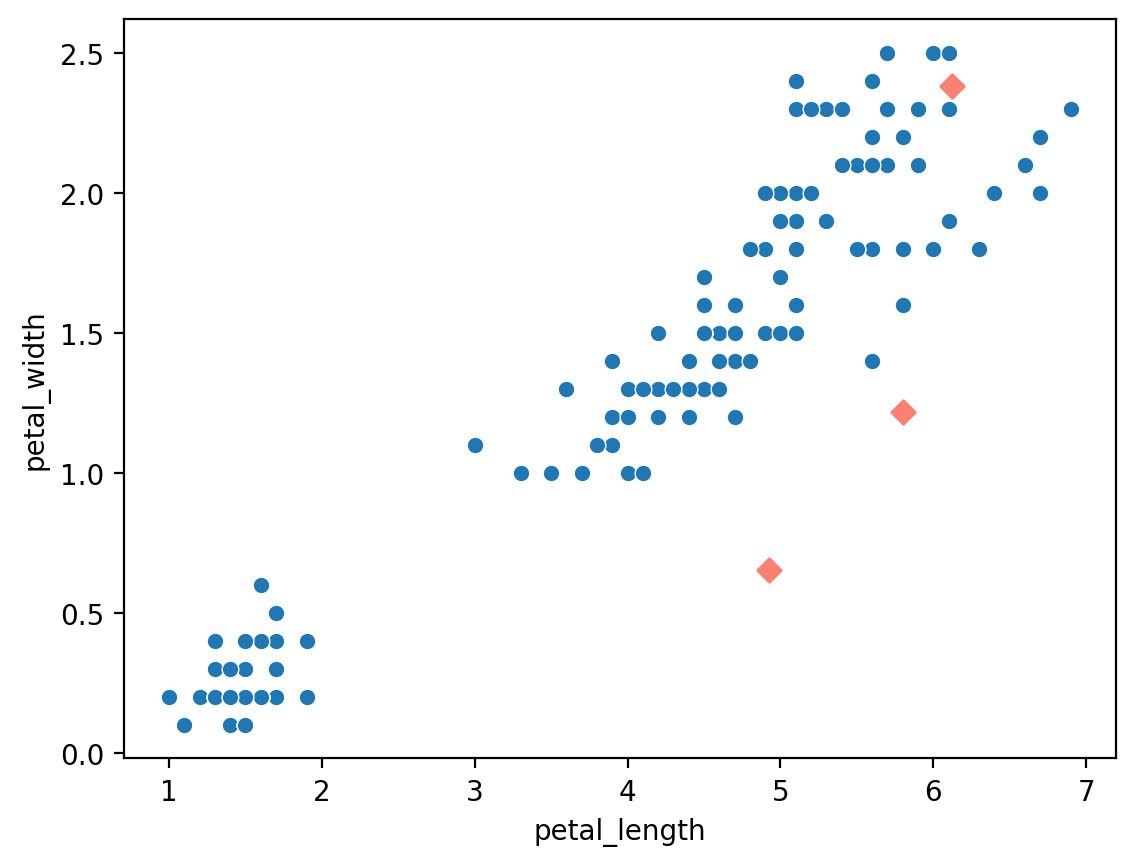

In [15]:
sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width')
plt.scatter(rx, ry, color = 'salmon', marker = 'D')

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters = 3)
model

KMeans(n_clusters=3)

In [18]:
# get X data

X = df[['petal_length', 'petal_width']]
X

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [19]:
model.fit(X) # fit/train a model

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
model.cluster_centers_ # centroids

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

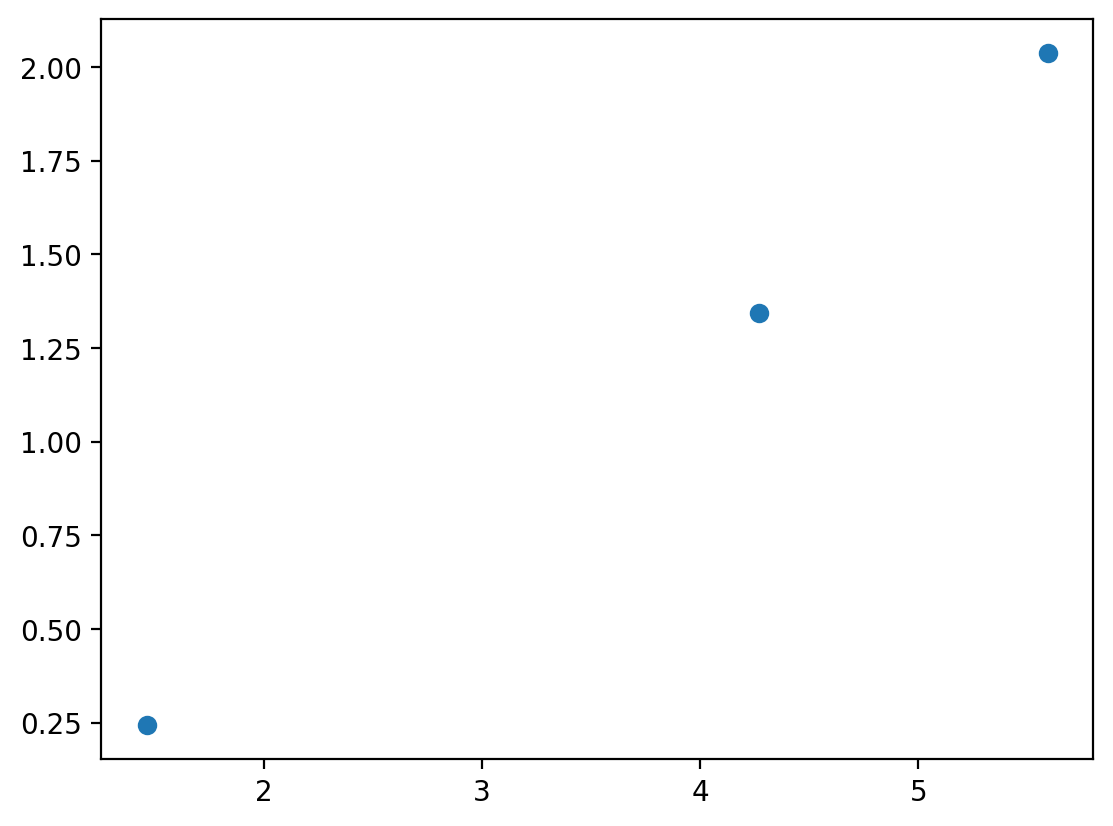

In [21]:
# plot controid

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1])

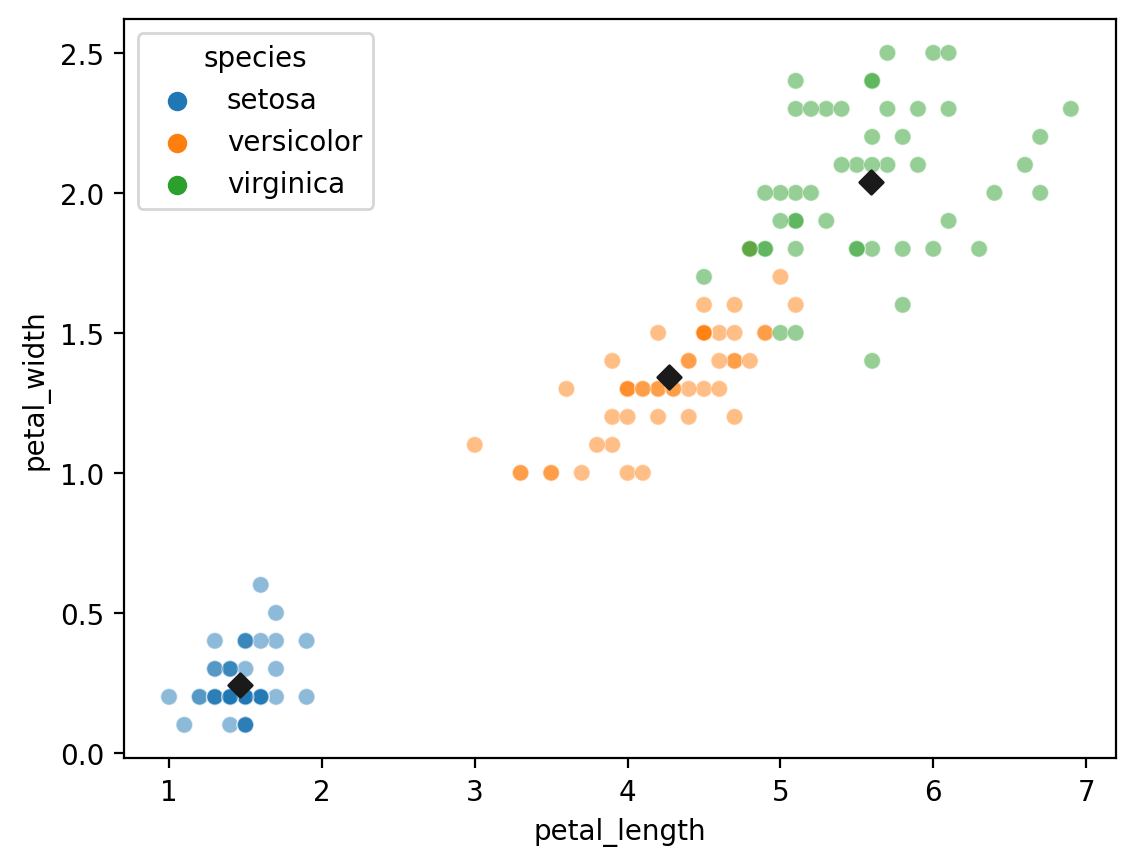

In [22]:
sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'species', alpha = .5)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = '.1', marker = 'D')

In [23]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [24]:
len(model.labels_)

150

In [25]:
df['species'].values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [26]:
# create a new column as 'cluster' to store its label

df['cluster'] = model.labels_
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [27]:
pd.crosstab(df['species'], df.cluster)

cluster,0,1,2
species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,46,0,4


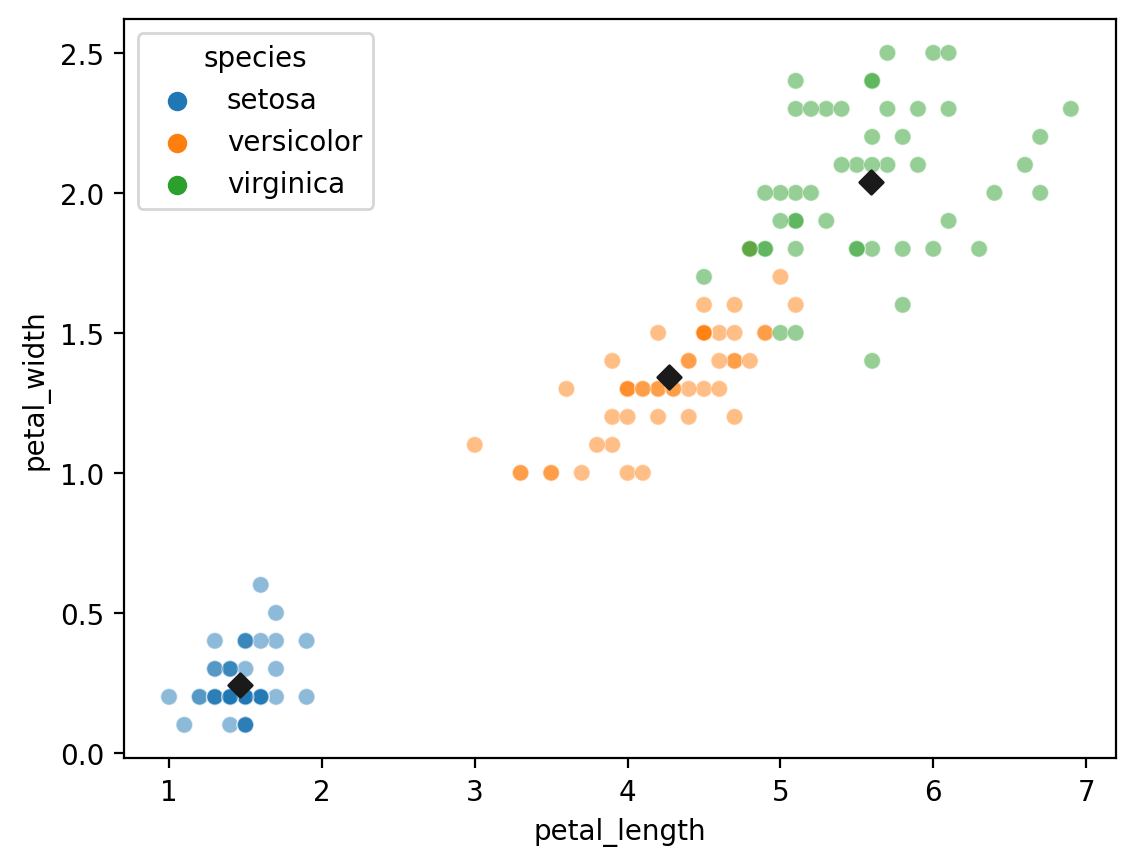

In [30]:
sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'species', alpha = .5)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = '.1', marker = 'D')

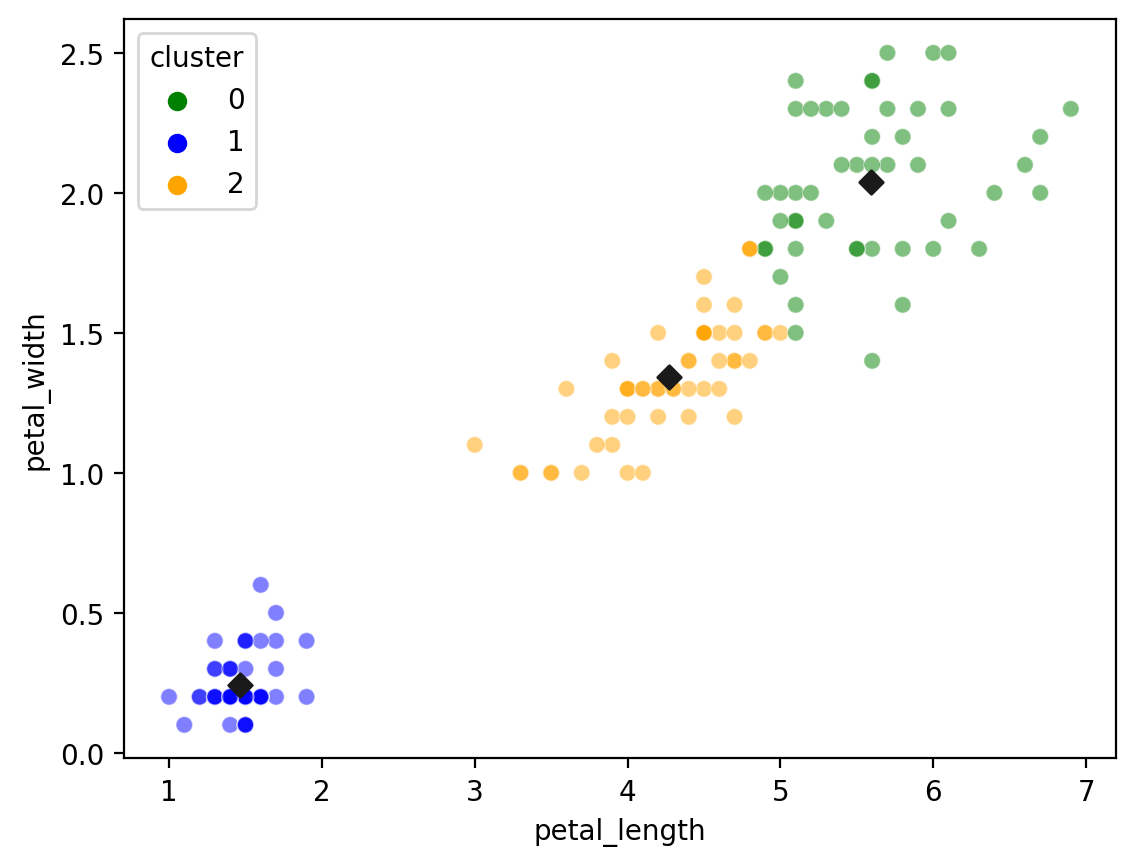

In [31]:
# assign colors

sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'cluster', alpha = .5, palette = ['green', 'blue', 'orange'])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = '.1', marker = 'D')

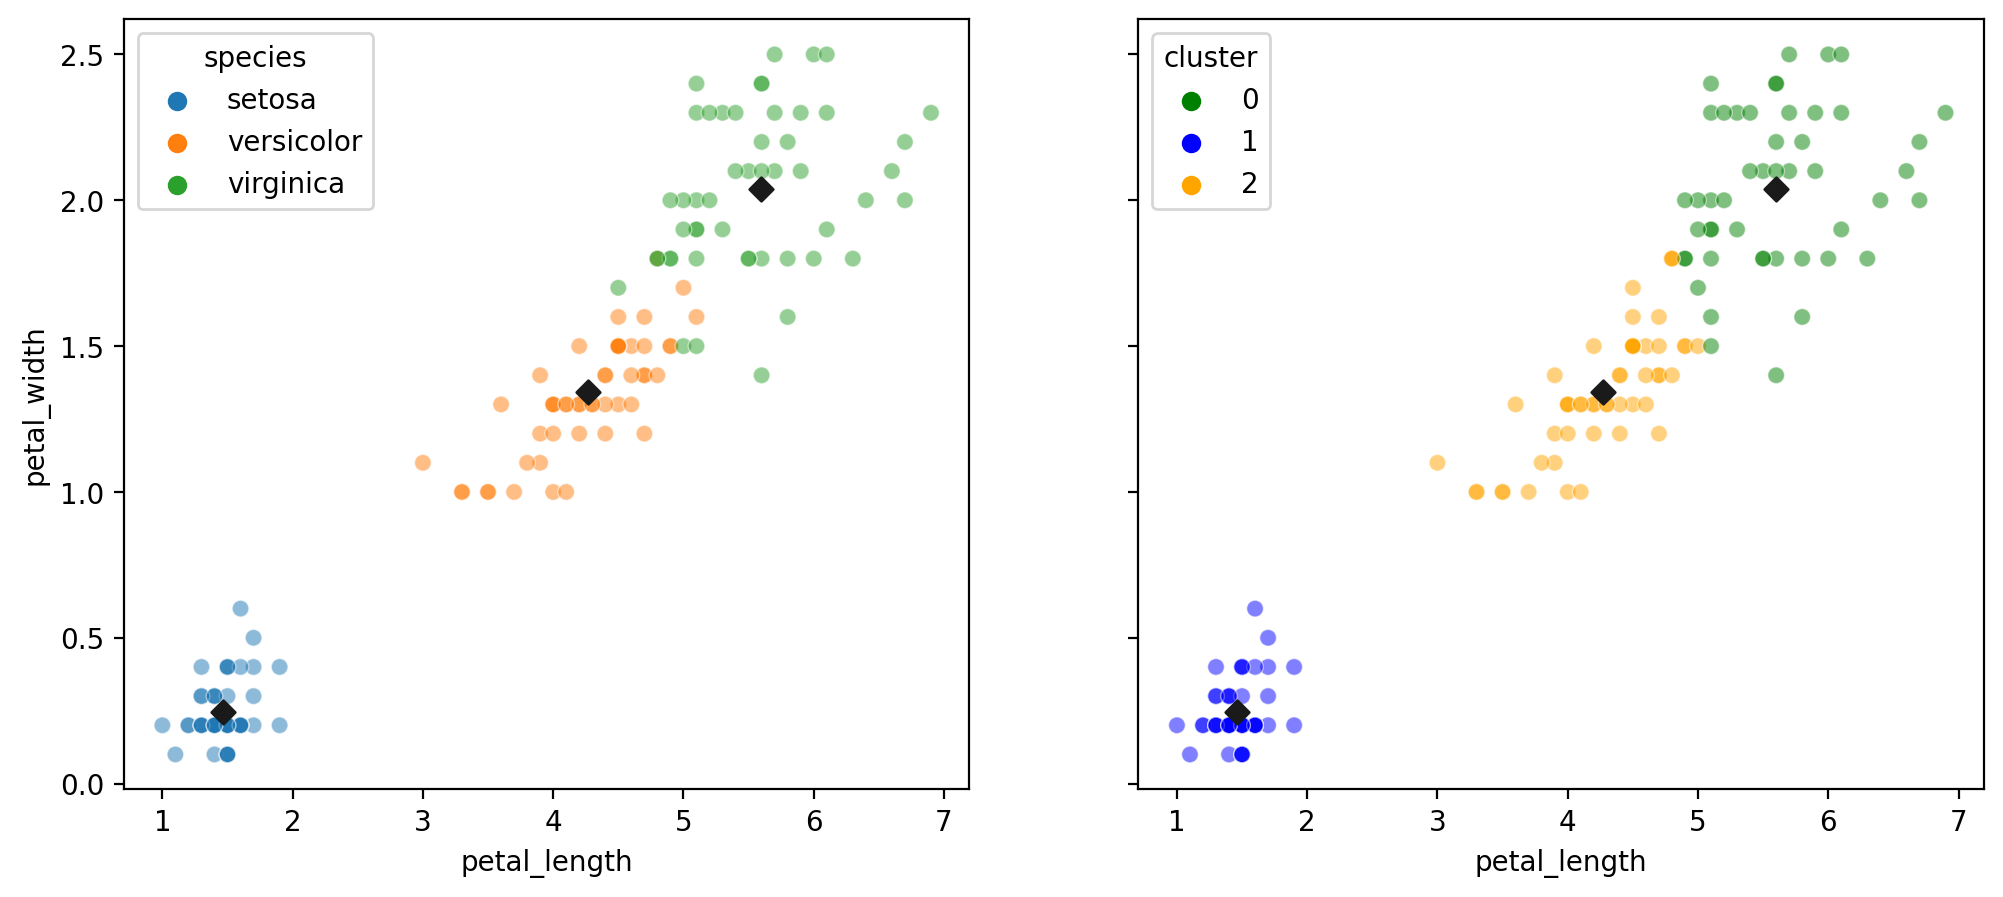

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5), sharey = True, sharex = True)

# left pic
g1 = sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'species', alpha = .5, ax = ax[0]) 
g1.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='.1', marker = 'D')

# right pic
g2 = sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'cluster', 
                   alpha = .5, palette = ['green', 'blue', 'orange'], ax = ax[1])
g2.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = '.1', marker = 'D')

In [36]:
pd.crosstab(df['species'], df['cluster'])

cluster,0,1,2
species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,46,0,4


In [37]:
X.head(3)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [38]:
model.predict(
    [
        [1.5, .3],
        [4.5, 1.3],
        [6, 2]
    ]
)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 2, 0], dtype=int32)